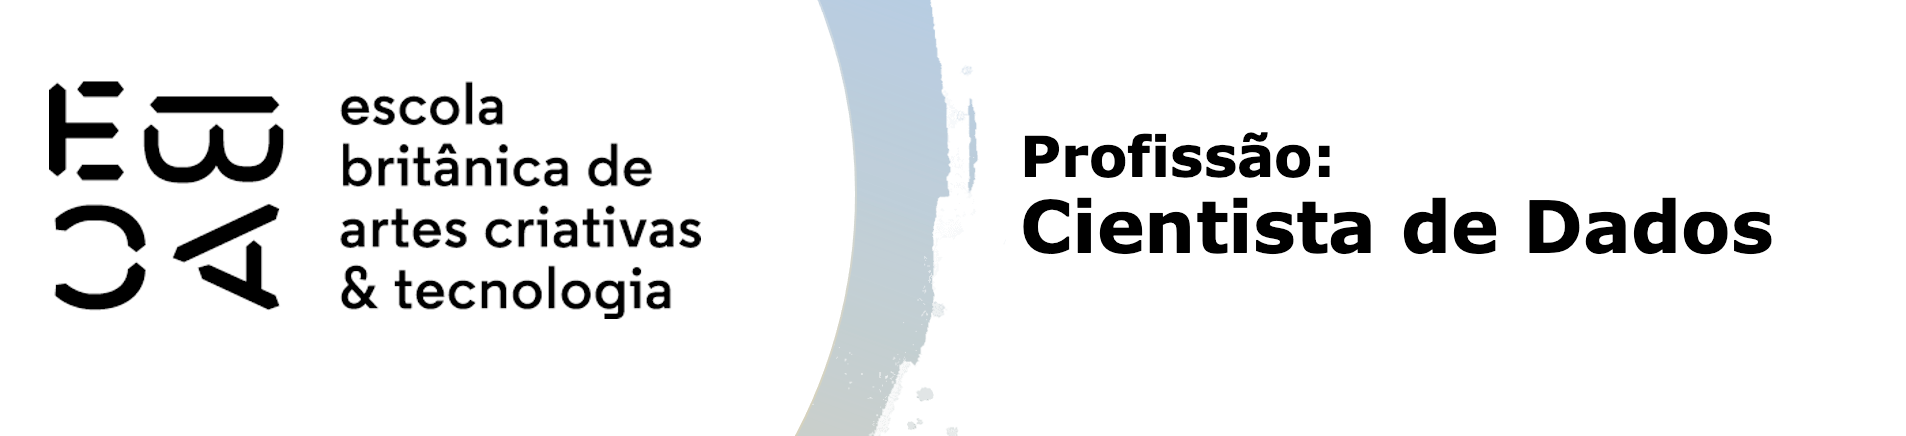

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min



In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
# Verificando valores missing
missing_values = df.iloc[:, :6].isnull().sum()
print("Valores faltantes por variável:")
print(missing_values)
print()

# Verificando a distribuição das 6 primeiras variáveis
print(df.iloc[:, :6].info())
df.iloc[:, :6].describe()

Valores faltantes por variável:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 578.1 KB
None


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


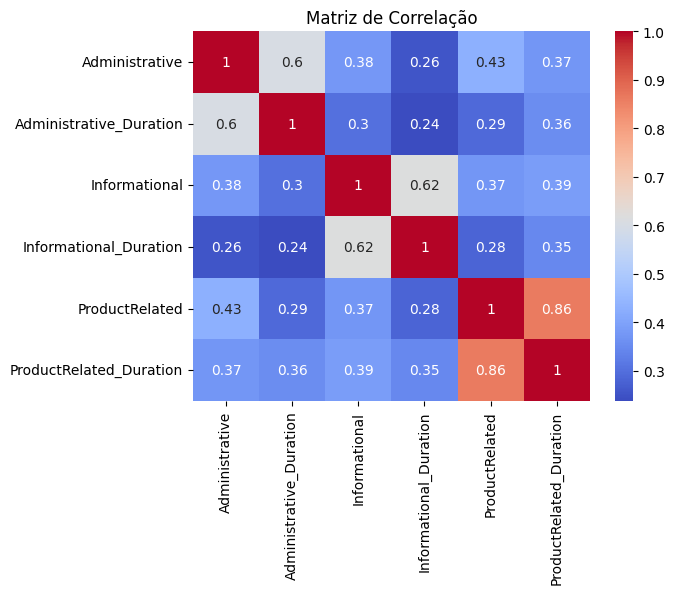

In [6]:
# Visualizando as correlações entre as variáveis
correlation_matrix = df.iloc[:, :6].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

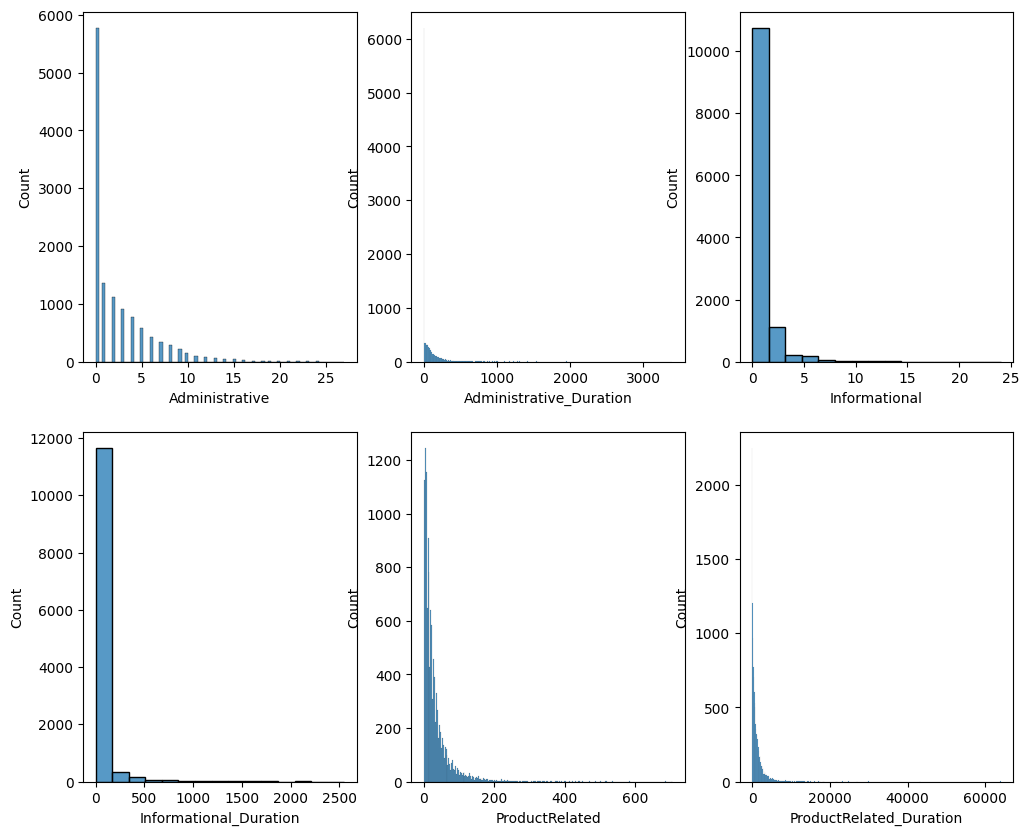

In [7]:
# Criando histogramas das 6 variáveis
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.histplot(data=df, x="Administrative")

plt.subplot(2, 3, 2)
sns.histplot(data=df, x="Administrative_Duration")

plt.subplot(2, 3, 3)
sns.histplot(data=df, x="Informational")

plt.subplot(2, 3, 4)
sns.histplot(data=df, x="Informational_Duration")

plt.subplot(2, 3, 5)
sns.histplot(data=df, x="ProductRelated")

plt.subplot(2, 3, 6)
sns.histplot(data=df, x="ProductRelated_Duration")

plt.show()


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

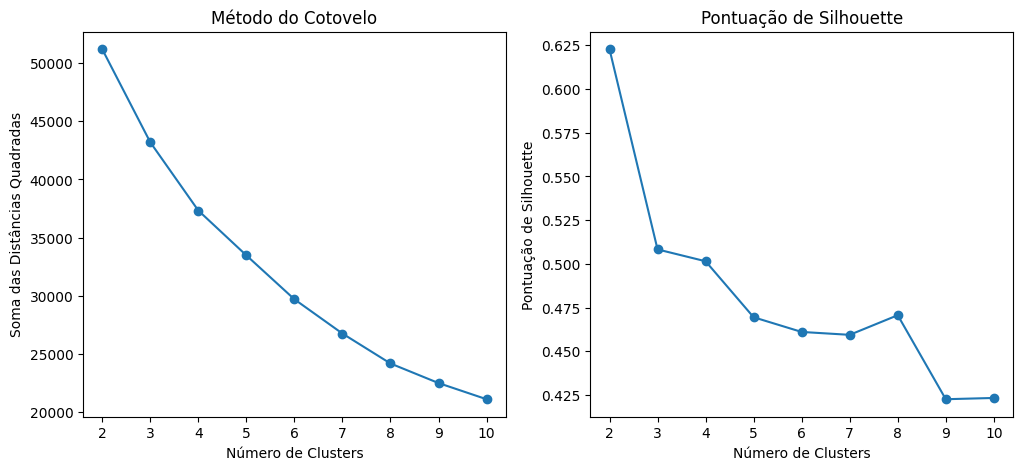

Número indicado de clusters (Método do Cotovelo): 3
Número indicado de clusters (Pontuação de Silhouette): 2


In [8]:
# Padronizando as variáveis
df_pad = StandardScaler().fit_transform(df.iloc[:, :6])

# listas para armazenar resultados
inertia_values = []
silhouette_scores = []

# Testando diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_pad)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pad, kmeans.labels_))

# Plotando o método do cotovelo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Soma das Distâncias Quadradas")

# Plotando a pontuação de Silhouette
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Pontuação de Silhouette")
plt.xlabel("Número de Clusters")
plt.ylabel("Pontuação de Silhouette")

plt.show()

print("Número indicado de clusters (Método do Cotovelo):", 3)

# Encontrar o número de clusters usando a pontuação de Silhouette
n_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
print("Número indicado de clusters (Pontuação de Silhouette):", n_silhouette)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [9]:
# Aplicando o KMeans com o número ótimo de clusters (Método do Cotovelo)
kmeans_optimal = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster_kmeans'] = kmeans_optimal.fit_predict(df_pad)  # Usamos df_standardized para padronizar as variáveis

# Análise descritiva para a solução de 3 grupos
grouped_mean_3 = df.groupby('cluster_kmeans').mean().iloc[:, :6]
grouped_mean_3

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_kmeans,,,,,,
0,7.027322,266.013931,4.142077,469.448035,138.418944,5745.803542
1,0.927004,24.924726,0.160976,6.570777,18.955368,690.181328
2,6.573831,253.314236,0.997129,43.448289,56.668171,2103.531829


In [10]:
# Aplicando o KMeans com o número ótimo de clusters (Silhouette)
kmeans_silhouette = KMeans(n_clusters=2, n_init=10, random_state=42)
df['cluster_kmeans_silhouette'] = kmeans_silhouette.fit_predict(df_pad)

# Calculando a média das 6 primeiras variáveis para cada grupo
grouped_mean_2 = df.groupby('cluster_kmeans_silhouette').mean().iloc[:, :6]
grouped_mean_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_kmeans_silhouette,,,,,,
0,1.497213,44.130111,0.189077,7.093277,21.376925,776.521555
1,7.270177,303.070693,2.408701,200.330001,94.457355,3728.273198


/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


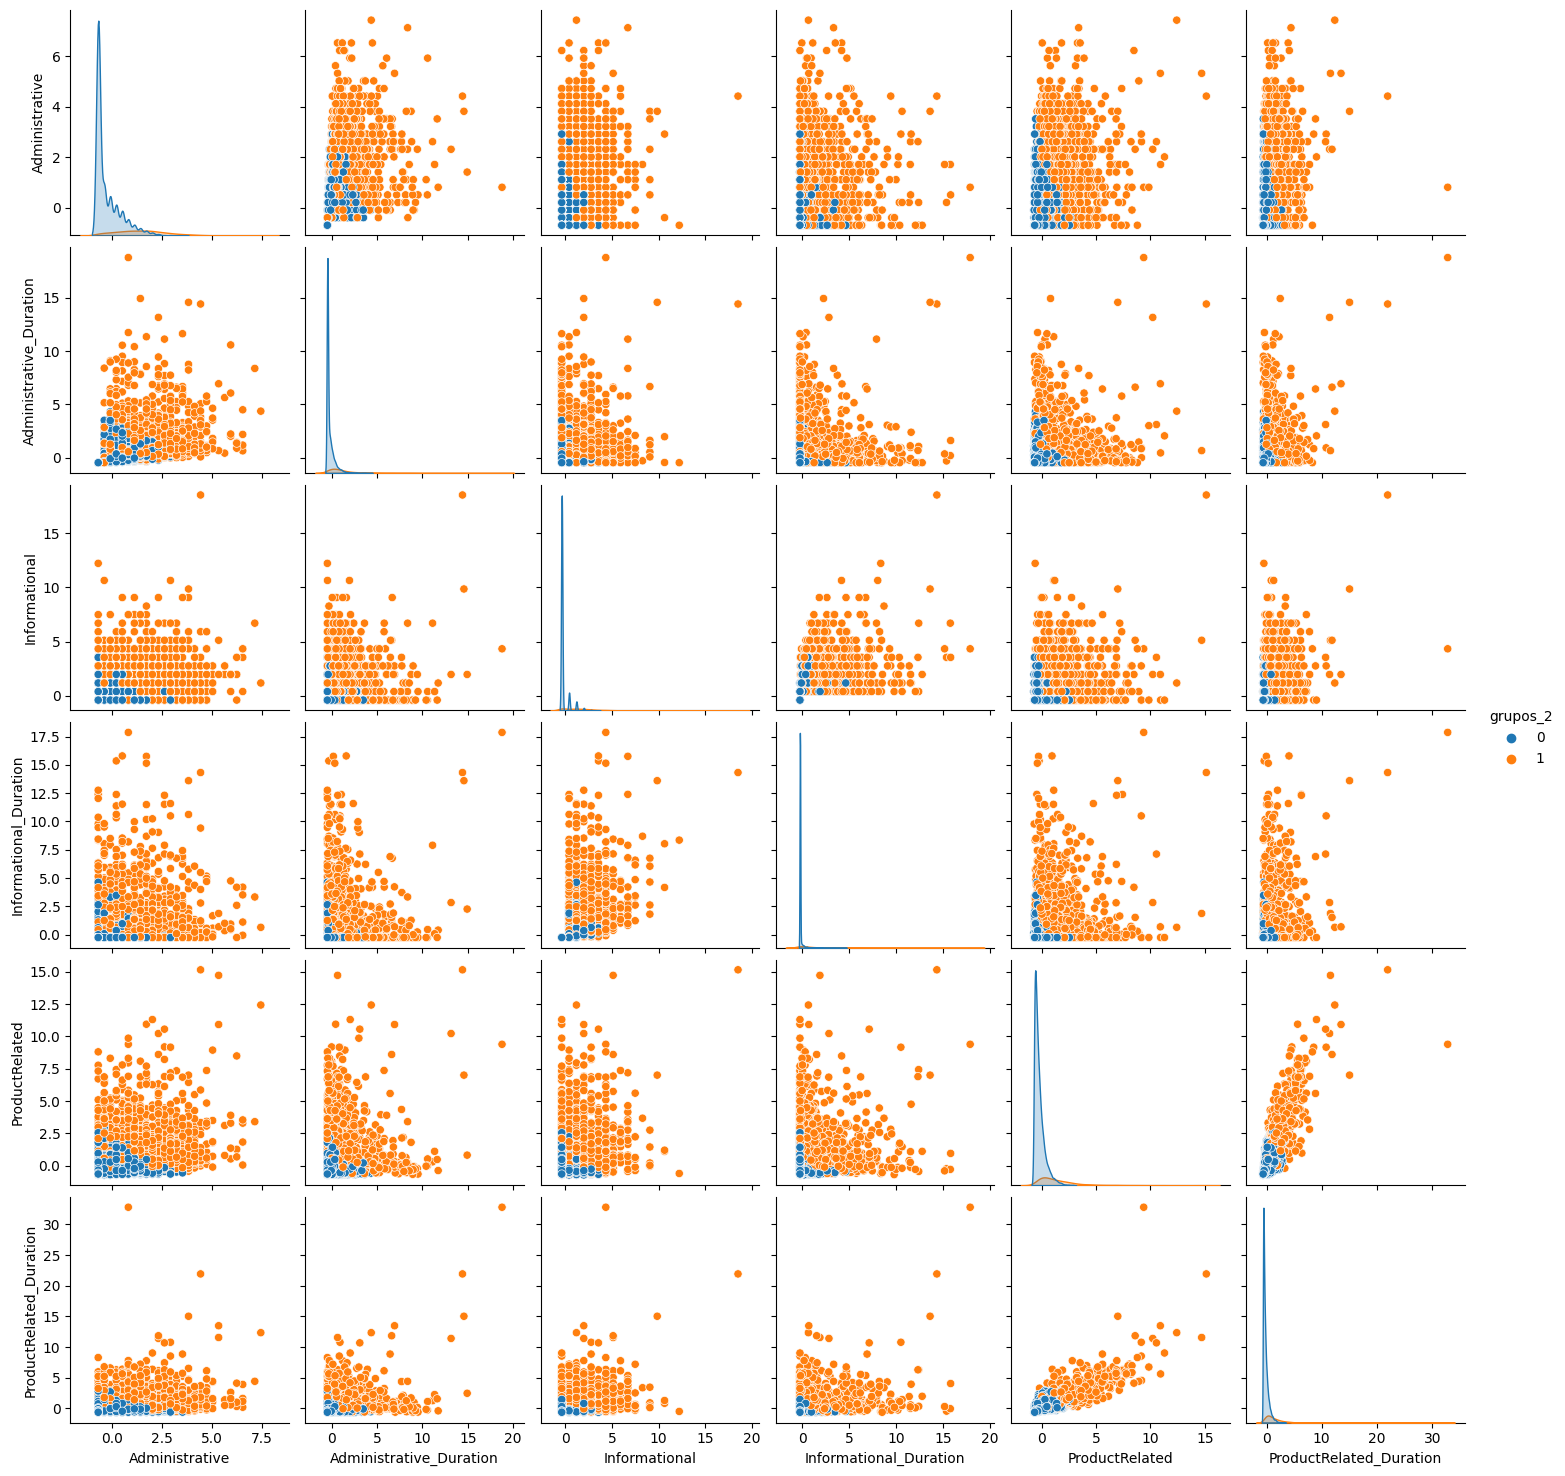

In [11]:
# Padronizando as variáveis e criar um DataFrame padronizado
df_pad = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:, :6]), columns=df.iloc[:, :6].columns)

# Criando o modelo de clustering com 2 grupos
cluster_2 = KMeans(n_clusters=2, n_init=10)
cluster_labels_2 = cluster_2.fit_predict(df_pad)

# Adicionando as labels dos clusters no DataFrame padronizado
df_pad['grupos_2'] = pd.Categorical(cluster_labels_2)

# Criando um gráfico de dispersão de pares com as labels dos clusters coloridas
sns.pairplot(df_pad, hue='grupos_2');

/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


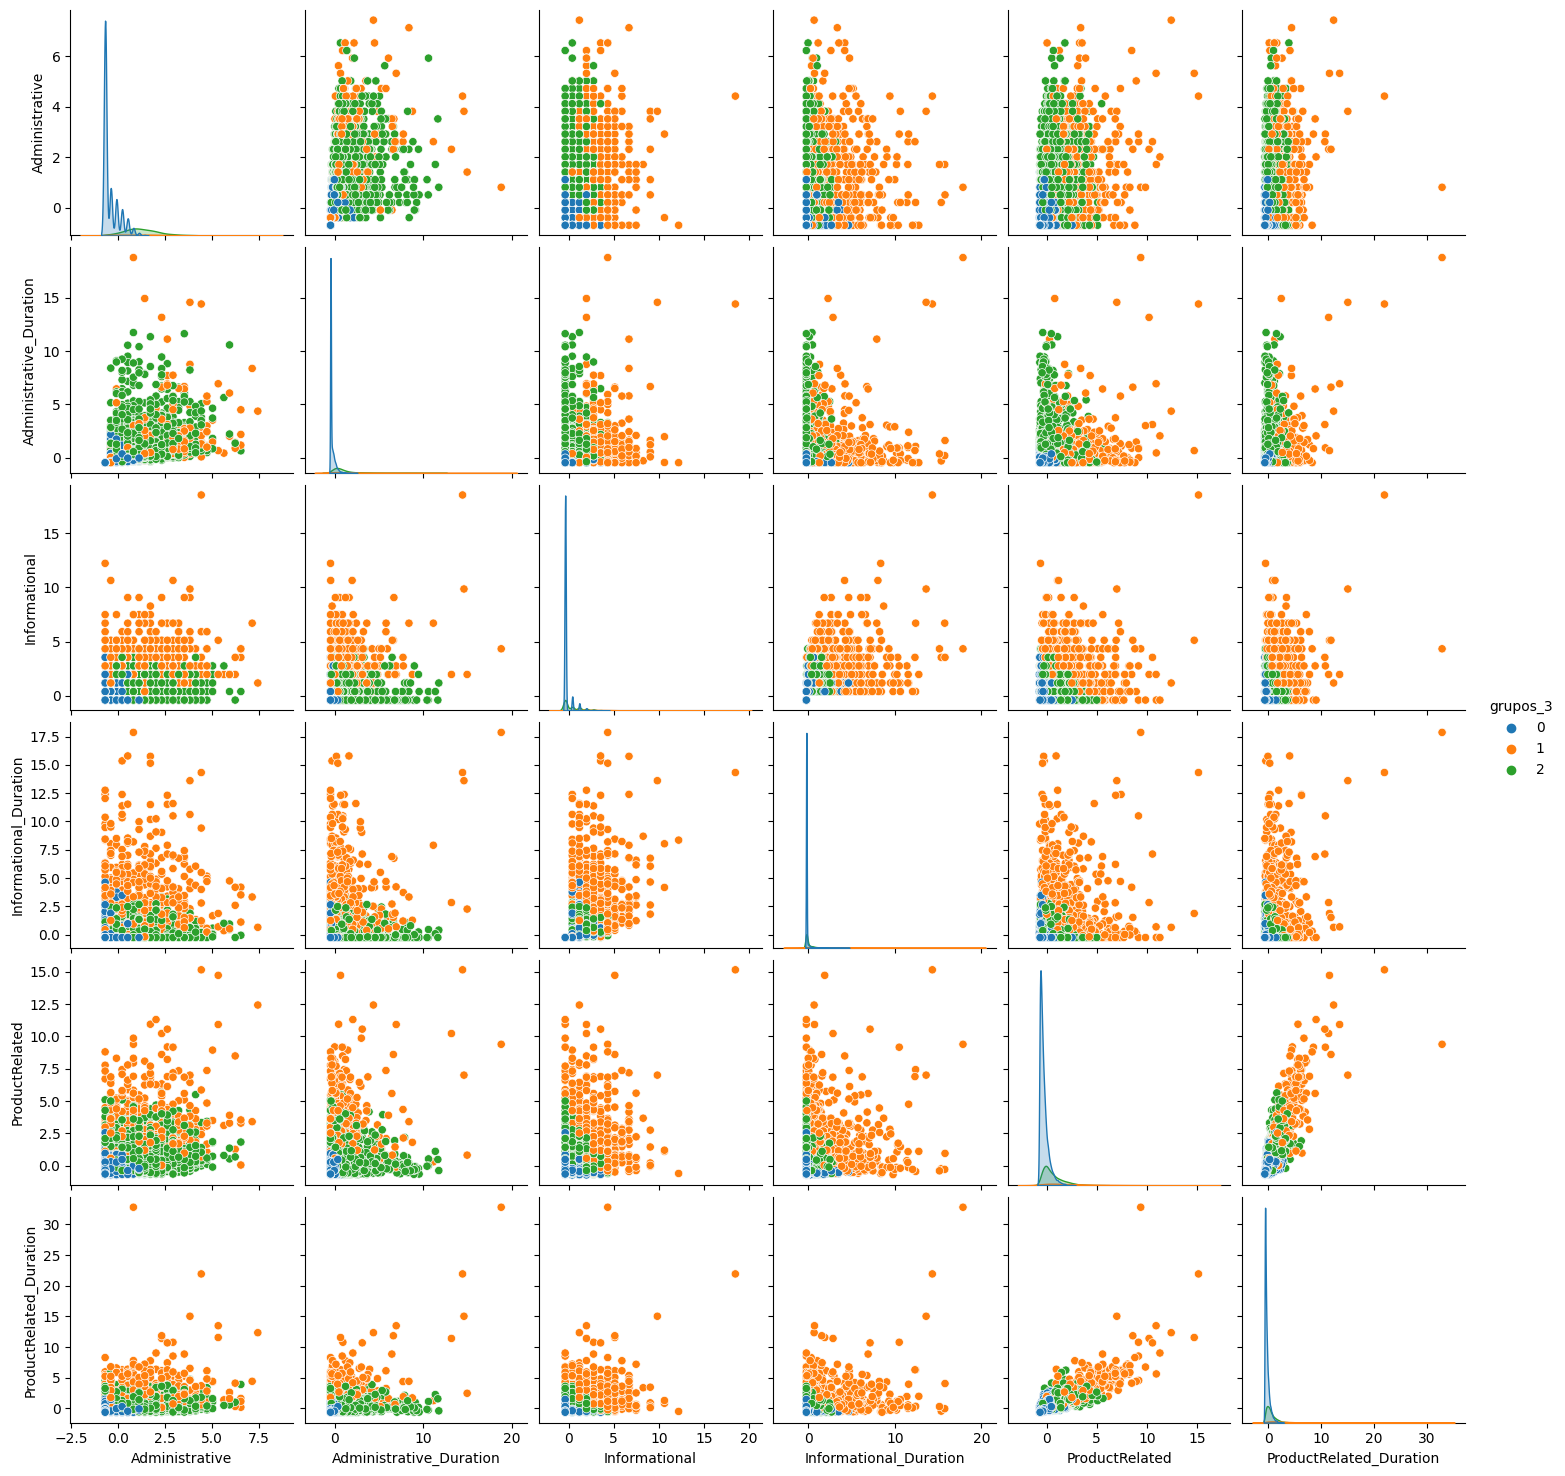

In [12]:
# Padronizando as variáveis e criar um DataFrame padronizado
df_pad = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:, :6]), columns=df.iloc[:, :6].columns)

# Criando o modelo de clustering com 3 grupos
cluster_3 = KMeans(n_clusters=3, n_init=10)
cluster_labels_3 = cluster_3.fit_predict(df_pad)

# Adicionando as labels dos clusters no DataFrame padronizado
df_pad['grupos_3'] = pd.Categorical(cluster_labels_3)

# Criando um gráfico de dispersão de pares com as labels dos clusters coloridas
sns.pairplot(df_pad, hue='grupos_3');

/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tsumano/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


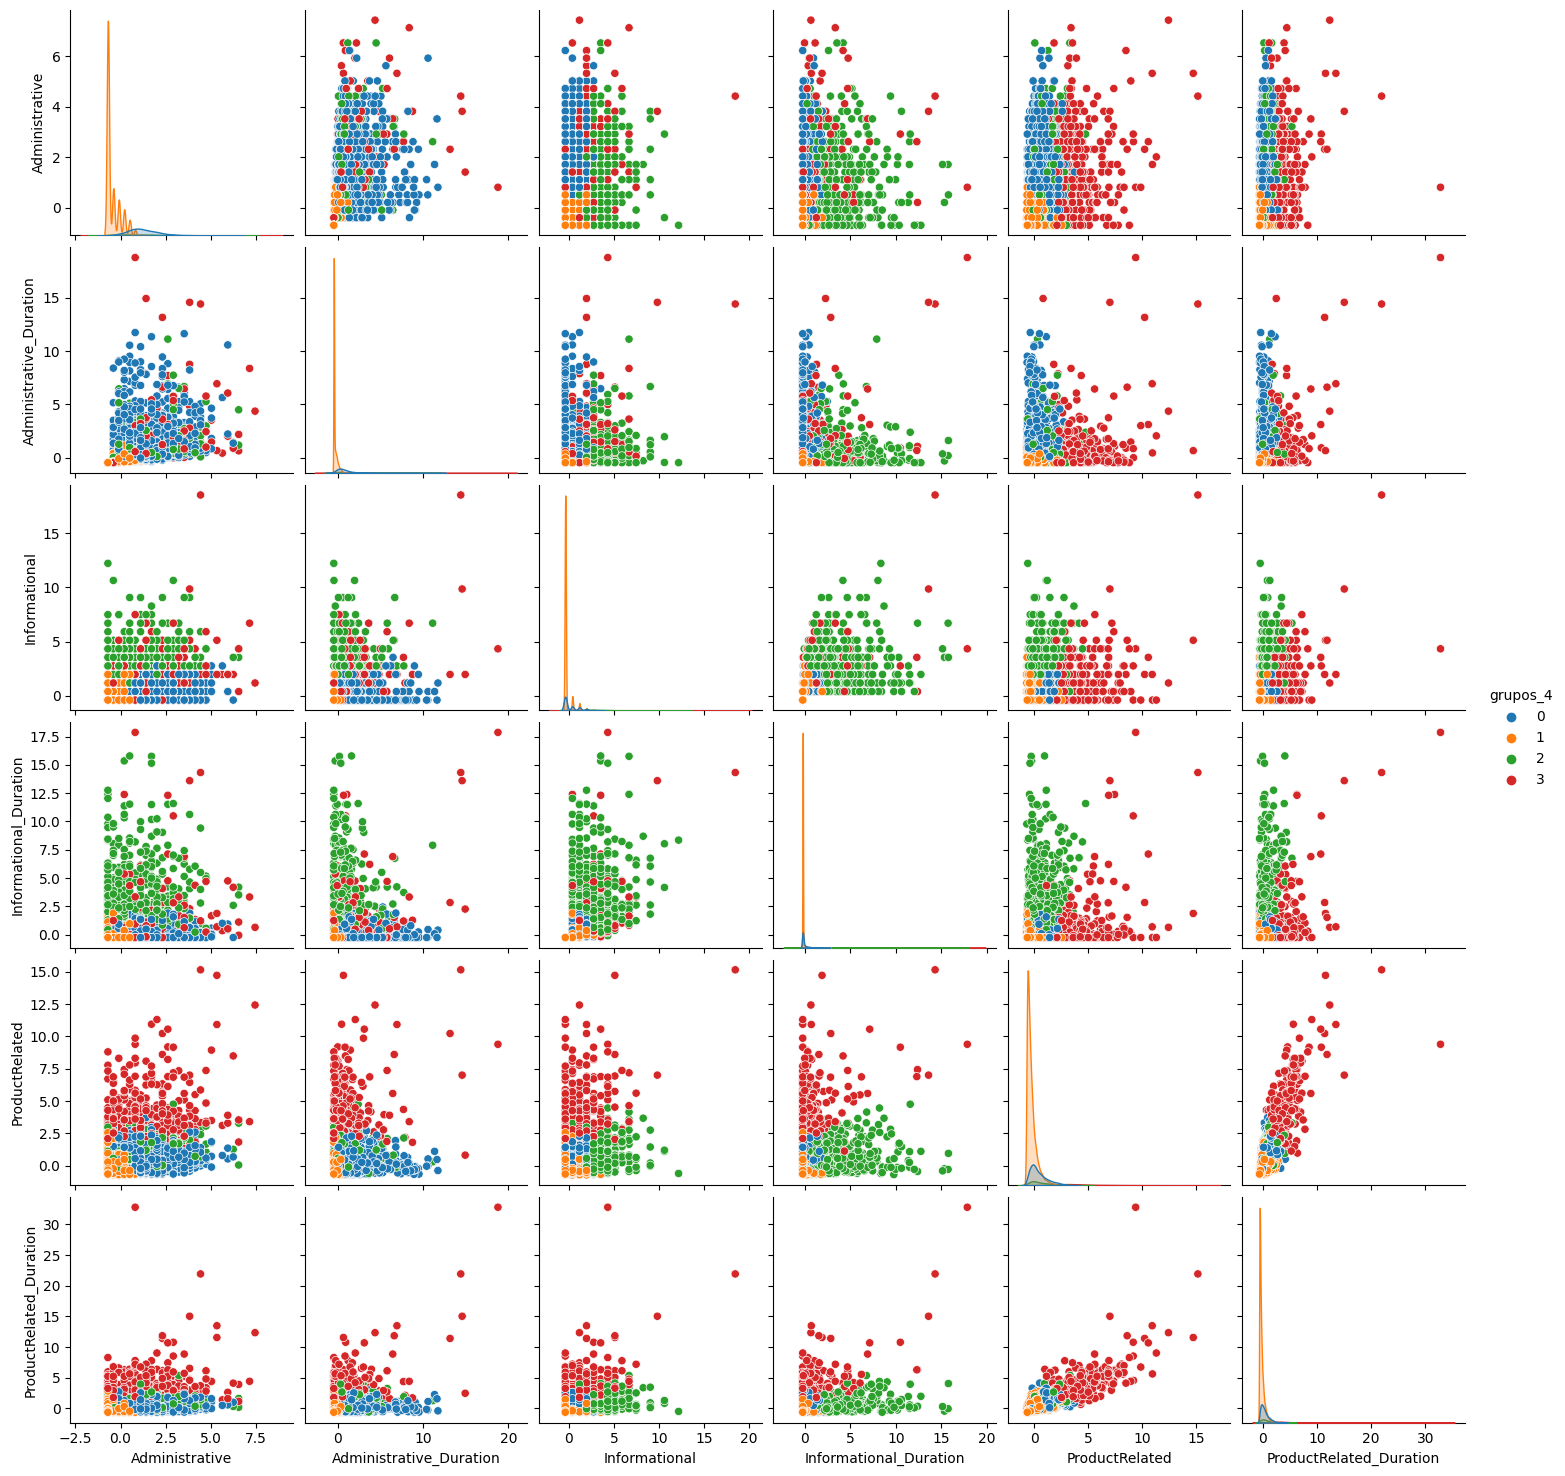

In [13]:
# Padronizando as variáveis e criar um DataFrame padronizado
df_pad = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:, :6]), columns=df.iloc[:, :6].columns)

# Criando o modelo de clustering com 4 grupos
cluster_4 = KMeans(n_clusters=4)
cluster_labels_4 = cluster_4.fit_predict(df_pad)

# Adicionando as labels dos clusters no DataFrame padronizado
df_pad['grupos_4'] = pd.Categorical(cluster_labels_4)

# Criando um gráfico de dispersão de pares com as labels dos clusters coloridas
sns.pairplot(df_pad, hue='grupos_4');

<span style="color: darkolivegreen;"> 
O modelo com 4 clusters parece ser o melhor

Cluster 1: Poucos acessos e pouco tempo de interação.<br>
Cluster 0: Poucos acessos em geral, pouco tempo em páginas informativas e de produtos.<br>
Cluster 3: Mais acesso e tempo em páginas informativas.<br>
Cluster 2: Maior acesso e tempo em páginas de produtos.</span>

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [14]:
# Renomeando os grupos
df_pad['grupos_4'].replace({1:"pouco_acesso", 0:"administrativo", 3:"produtos", 2:"informativo"}, inplace=True)

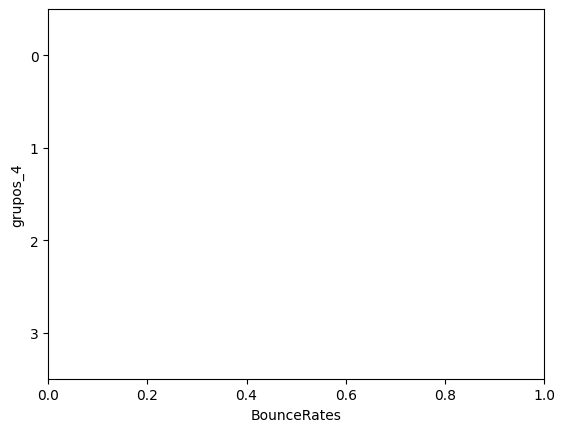

In [15]:
# Adicionando as colunas 'BounceRates' e 'Revenue' ao DataFrame padronizado
df_pad['BounceRates'] = df['BounceRates']
df_pad['Revenue'] = df['Revenue']

# Criando um boxplot para visualizar a distribuição de 'BounceRates' nos grupos
sns.boxplot(data=df_pad, y='grupos_4', x='BounceRates');

In [16]:
# Criando uma tabela de contingência para 'Revenue' e 'grupos_4'
cross_tab = pd.crosstab(df_pad.Revenue, df_pad.grupos_4)
cross_tab

grupos_4,administrativo,informativo,pouco_acesso,produtos
Revenue,,,,
False,1763,405,8033,221
True,518,149,1135,106


In [17]:
# Calculando a porcentagem de 'True' e 'False' em cada coluna da tabela de contingência
normalized_cross_tab = pd.crosstab(df_pad.Revenue, df_pad.grupos_4, normalize='columns')
print("\nPorcentagem de True e False por Grupo:")
normalized_cross_tab


Porcentagem de True e False por Grupo:


grupos_4,administrativo,informativo,pouco_acesso,produtos
Revenue,,,,
False,0.772907,0.731047,0.8762,0.675841
True,0.227093,0.268953,0.1238,0.324159


<span style= "color: darkolivegreen;"> O grupo "produtos" é aquele onde os clientes têm uma tendência mais forte de realizar compras. Isso é evidenciado pelo fato de que esse grupo apresenta a maior proporção de clientes que efetivamente realizaram compras. E também exibe valores mais baixos de "Bounce Rate" em comparação com os outros grupos..</span>